In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Flatten

from sklearn.preprocessing import OneHotEncoder

# Load & Preprocess Data

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
label_dict = {
  0: 'T-shirt/top',
  1: 'Trouser',
  2: 'Pullover',
  3: 'Dress',
  4: 'Coat',
  5: 'Sandal',
  6: 'Shirt',
  7: 'Sneaker',
  8: 'Bag',
  9: 'Ankle boot'
}

## Normalise Image Data

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## One-Hot Encode Labels

In [5]:
ohe = OneHotEncoder(categories='auto')
ohe.fit(y_train.reshape(-1, 1))
y_train = ohe.transform(y_train.reshape(-1, 1))
y_test = ohe.transform(y_test.reshape(-1, 1))

# Basic Exploratory Data Analysis

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
print('train data shape: {}; target shape: {}'.format(X_train.shape, y_train.shape))
print('test data shape: {}; target shape: {}'.format(X_test.shape, y_test.shape))

train data shape: (60000, 28, 28); target shape: (60000, 10)
test data shape: (10000, 28, 28); target shape: (10000, 10)


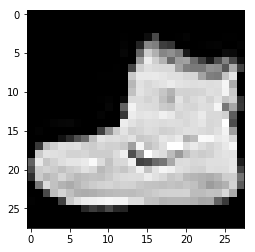

In [8]:
sample = X_train[0]
plt.imshow(sample, cmap='gray')

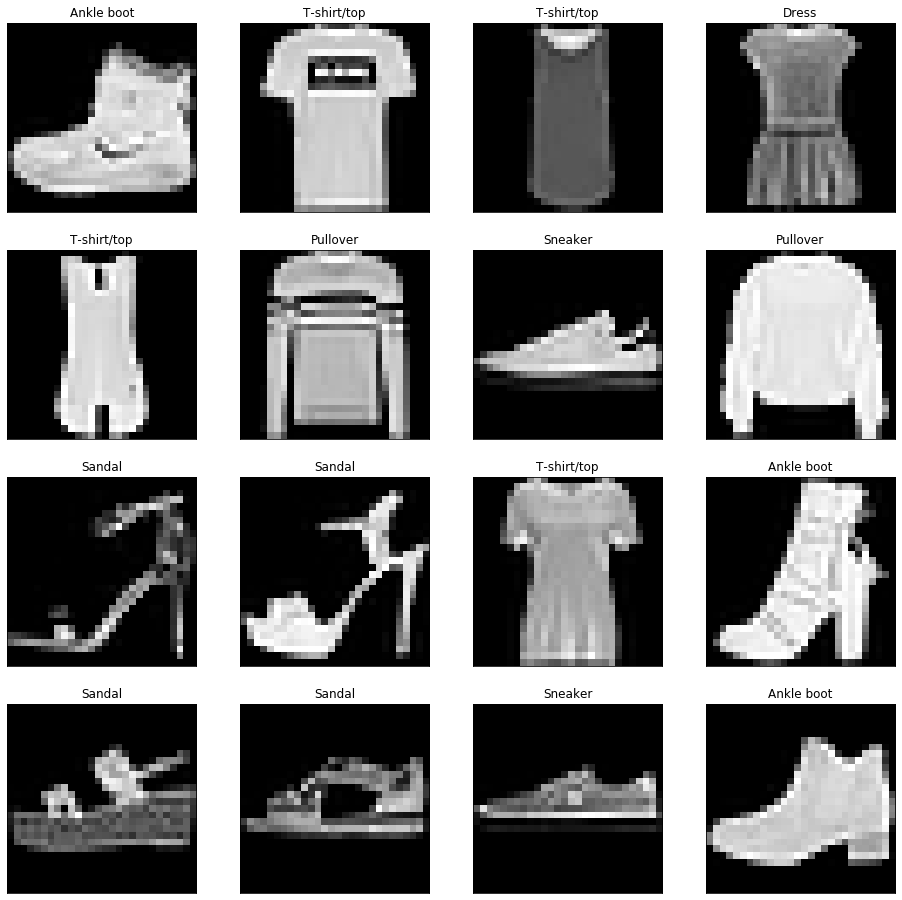

In [9]:
nrows = 4
ncols = 4

fig, axes = plt.subplots(nrows, ncols)
fig.set_size_inches(16, 16)

i = 0

for row in range(nrows):
    for col in range(ncols):
        img = X_train[i]
        label = label_dict[y_train[i].argmax()]

        axis = axes[row, col]
        axis.imshow(img, cmap='gray')
        axis.get_xaxis().set_visible(False)
        axis.get_yaxis().set_visible(False)
        axis.set_title(label)
        
        i += 1

# Building the Model

In [10]:
batch_size = 32
img_dim = X_train[0].shape

print('Image Dimensions: {}'.format(img_dim))

Image Dimensions: (28, 28)


In [11]:
model = keras.models.Sequential([
    Flatten(input_shape=img_dim),
    Dense(512),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training and Evaluating the Model

In [12]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.4950 - acc: 0.8219
Epoch 2/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.3803 - acc: 0.8654
Epoch 3/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.3550 - acc: 0.8782
Epoch 4/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.3433 - acc: 0.8835
Epoch 5/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.3356 - acc: 0.8880
Epoch 6/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.3222 - acc: 0.8935
Epoch 7/10
60000/60000 [==============================] - 14s 227us/step - loss: 0.3165 - acc: 0.8972
Epoch 8/10
60000/60000 [==============================] - 14s 231us/step - loss: 0.3118 - acc: 0.8991
Epoch 9/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.3066 - acc: 0.9019
Epoch 10/10
60000/60000 [==============================] - 12s 203us/step - loss: 

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 82us/step
Test accuracy: 0.8751


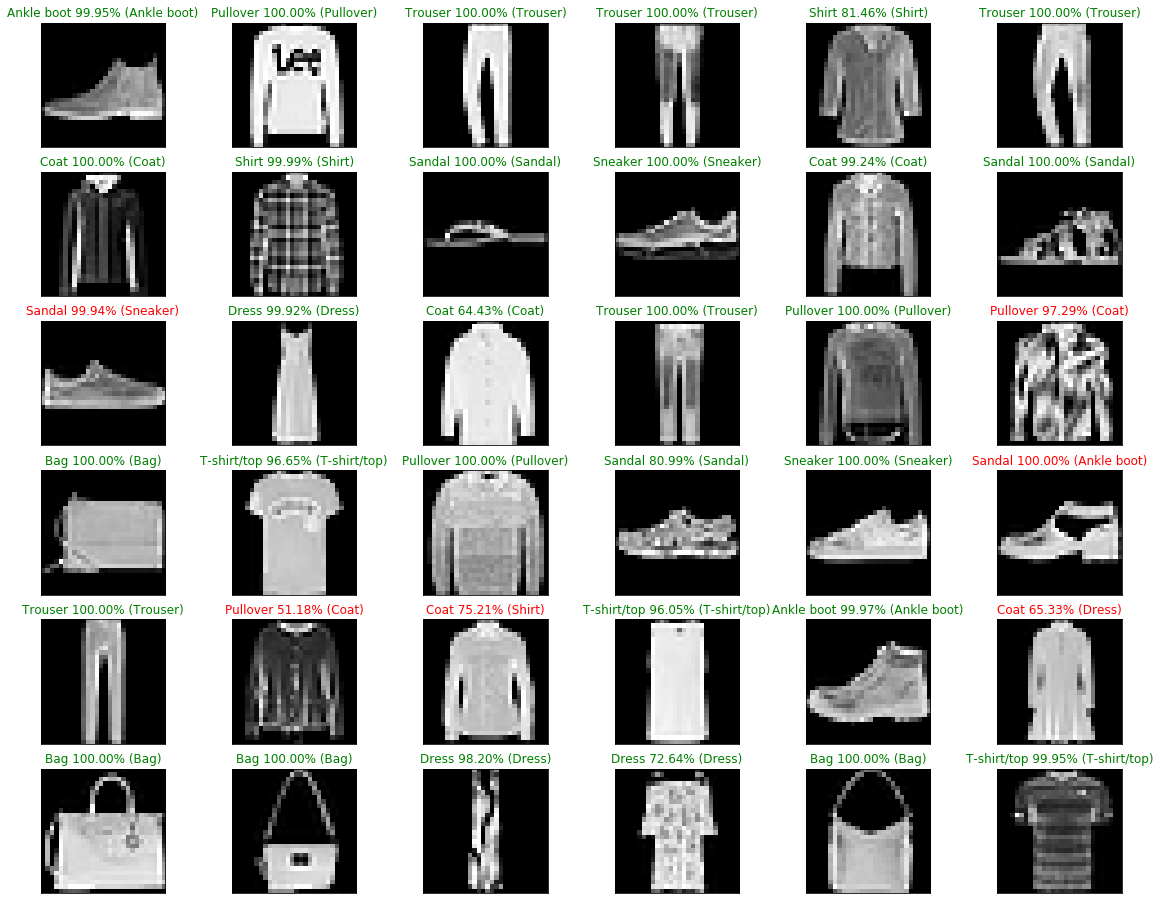

In [14]:
nrows = 6
ncols = 6
ntotal = nrows * ncols
i = 0

fig, axes = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 16)

predictions = model.predict_proba(X_test[:ntotal])

for row in range(nrows):
    for col in range(ncols):
        img = X_test[i]        
        predicted_label = label_dict[predictions[i].argmax()]
        probability = predictions[i].max() * 100
        actual_label = label_dict[y_test[i].argmax()]
        title_colour = 'green' if predicted_label == actual_label else 'red'

        axis = axes[row, col]
        axis.imshow(img, cmap='gray')
        axis.get_xaxis().set_visible(False)
        axis.get_yaxis().set_visible(False)
        axis.set_title('{} {:.2f}% ({})'.format(predicted_label, probability, actual_label), color=title_colour)
        
        i += 1

# CNN

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
import numpy as np

## Expand Data Dimensions

Add in an extra dimension for channels.
The images in the Fashion MNIST dataset are grayscale so there is only one channel.

In [16]:
print(img_dim)
print(X_train.shape)
print(X_test.shape)

(28, 28)
(60000, 28, 28)
(10000, 28, 28)


In [19]:
X_train_with_channels = np.expand_dims(X_train, axis=3)
X_test_with_channels = np.expand_dims(X_test, axis=3)
cnn_input_shape = X_train_with_channels[0].shape

print(img_dim)
print(X_train_with_channels.shape)
print(X_test_with_channels.shape)

(28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [20]:
cnn = keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=cnn_input_shape),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(10, activation='softmax')
])

In [21]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [25]:
cnn.compile(optimizer='rmsprop',
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])

In [ ]:
history = cnn.fit(X_train_with_channels, y_train, batch_size=batch_size, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 153s 3ms/step - loss: 0.4739 - acc: 0.8282
Epoch 2/10
60000/60000 [==============================] - 150s 3ms/step - loss: 0.3319 - acc: 0.8817
Epoch 3/10
60000/60000 [==============================] - 136s 2ms/step - loss: 0.3197 - acc: 0.8889
Epoch 4/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.3283 - acc: 0.8881
Epoch 5/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.3368 - acc: 0.8861
Epoch 6/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.3547 - acc: 0.8838
Epoch 7/10
59296/60000 [============================>.] - ETA: 1s - loss: 0.3635 - acc: 0.8814

In [ ]:
test_loss, test_acc = cnn.evaluate(X_test_with_channels, y_test)

print('Test accuracy:', test_acc)

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = cnn.predict(X_test_with_channels)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
nrows = 6
ncols = 6
ntotal = nrows * ncols
i = 0

fig, axes = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 16)

predictions = cnn.predict_proba(X_test[:ntotal])

for row in range(nrows):
    for col in range(ncols):
        img = X_test[i]        
        predicted_label = label_dict[predictions[i].argmax()]
        probability = predictions[i].max() * 100
        actual_label = label_dict[y_test[i].argmax()]
        title_colour = 'green' if predicted_label == actual_label else 'red'

        axis = axes[row, col]
        axis.imshow(img, cmap='gray')
        axis.get_xaxis().set_visible(False)
        axis.get_yaxis().set_visible(False)
        axis.set_title('{} {:.2f}% ({})'.format(predicted_label, probability, actual_label), color=title_colour)
        
        i += 1